In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

In [2]:
sdf = src.read_csv('../Data/results/toy_star_2D.csv')
sdf.params={'mass':2.0/100}
sdf

,x,y,vx,vy,u,h,rho
0,0.066590,0.588946,-0.001176,0.004600,0.000000,0.184323,0.847686
1,0.483274,0.338657,-0.000127,0.003981,0.000000,0.182023,0.869245
2,0.389426,0.421058,0.000816,0.007422,0.000000,0.175005,0.940355
3,0.338516,0.274692,0.003112,0.000440,0.002292,0.141523,1.437927
4,-0.353970,0.258286,0.004307,0.003999,-0.008420,0.141941,1.429468
...,...,...,...,...,...,...,...
95,0.175800,0.026606,-0.001072,-0.005646,0.000885,0.117439,2.088175
96,-0.275969,0.292265,-0.003782,0.001448,0.000839,0.136599,1.543474
97,-0.527229,0.271496,0.000689,-0.000857,-0.005058,0.185203,0.839645
98,0.172929,-0.255360,-0.005537,-0.004633,-0.002524,0.126097,1.811256


<Axes: xlabel='x', ylabel='y'>

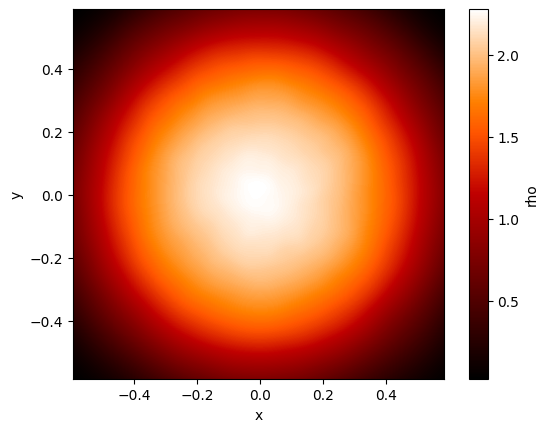

In [3]:
sdf.render('rho', xsec=1.0)

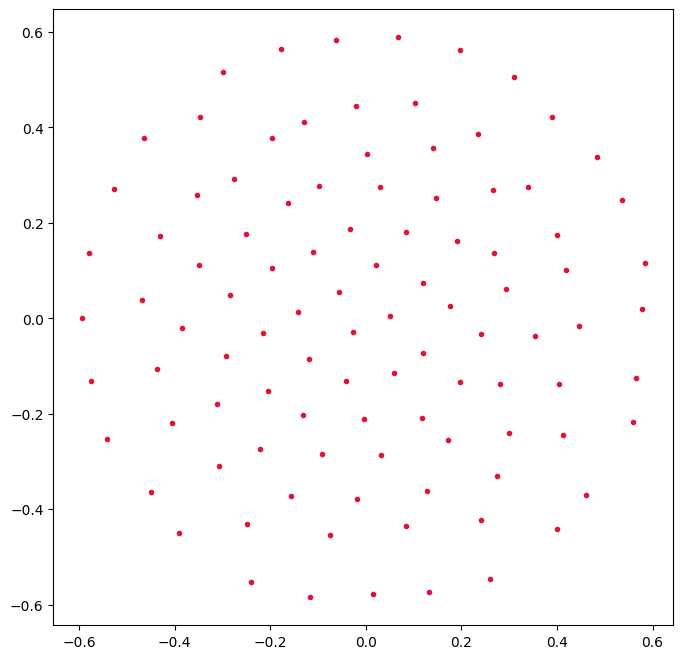

In [4]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

In [5]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [6]:
R = 0.75
k = 0.1
M = 2.0
n = 1.0
lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M

In [7]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

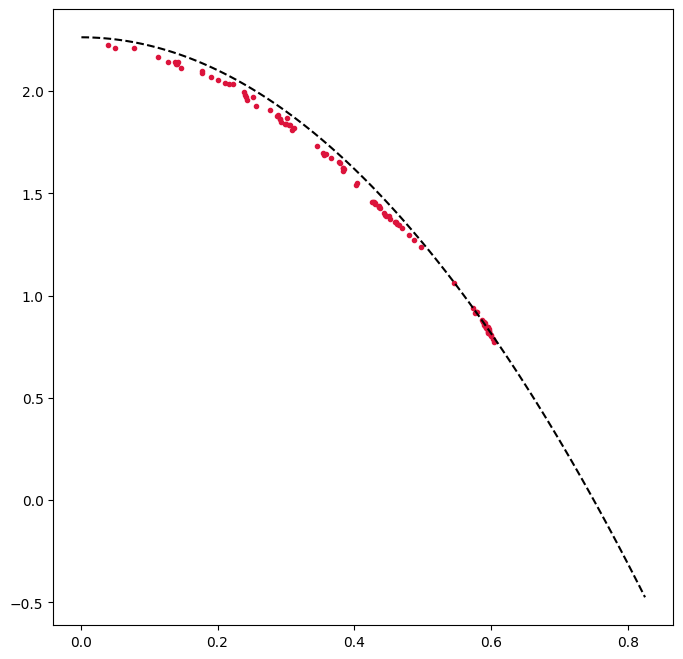

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.show()